# Example code for decision trees

In [1]:
import numpy as np
from sklearn.datasets import make_classification, make_moons, make_blobs

import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

## Recurring examples

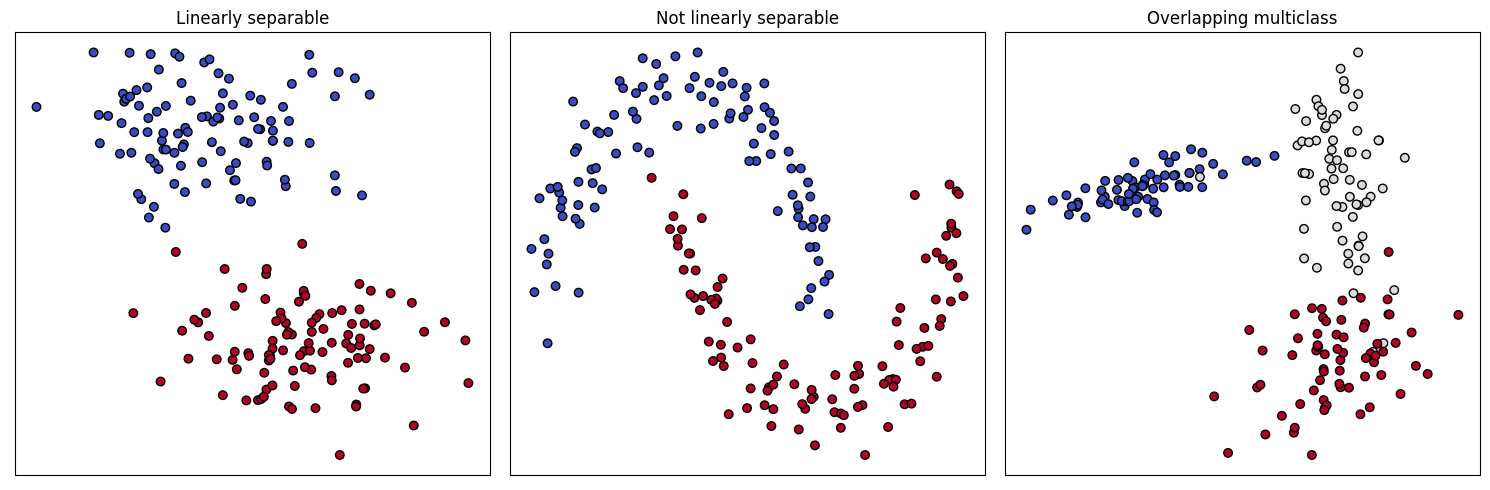

In [2]:
def plot_classification(classifier=None):
  data = [make_blobs(n_samples=200, centers=2, cluster_std=.7, n_features=2, random_state=0),
          make_moons(n_samples=200, noise=.1, random_state=0),
          make_classification(n_samples=200, n_features=2, n_informative=2, 
                              n_redundant=0, n_repeated=0, n_classes=3, class_sep=1.8,
                              n_clusters_per_class=1, random_state=0)]

  fig = plt.figure(figsize=(15, 5), dpi=100)
  ax = fig.subplots(1, 3)
  titles = ['Linearly separable', 'Not linearly separable', 'Overlapping multiclass']
  for i, (X, y) in enumerate(data):
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=150, marker='.', edgecolor='k', cmap='coolwarm')
    ax[i].set_title(titles[i])
    if classifier is not None:
      classifier.fit(X, y)
      a = ax[i].axis()
      XX, YY = np.meshgrid(np.linspace(a[0], a[1], 20),
                          np.linspace(a[2], a[3], 20))
      Z = classifier.predict(np.concatenate([np.vstack(XX.ravel()), 
                                            np.vstack(YY.ravel())], axis=1))
      # ax[i].contourf(XX, YY, Z.reshape(XX.shape), alpha=.5, cmap='coolwarm', zorder=-1)#, levels=np.arange(y.min()+0.5, y.max()))
      ax[i].pcolor(XX, YY, Z.reshape(XX.shape), alpha=.5, cmap='coolwarm', edgecolors='none', snap=True, zorder=-1)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
  fig.tight_layout()
  fig.show()

plot_classification()

Now for testing the tree classifier

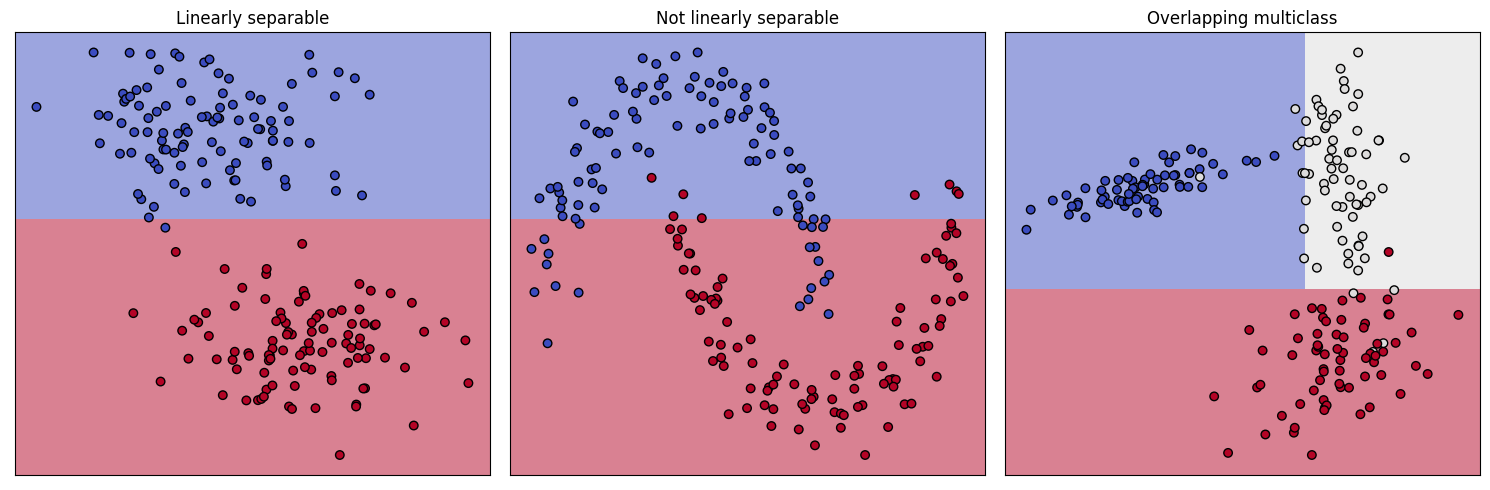

In [3]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.1)
plot_classification(classifier)

A visualisation of the tree

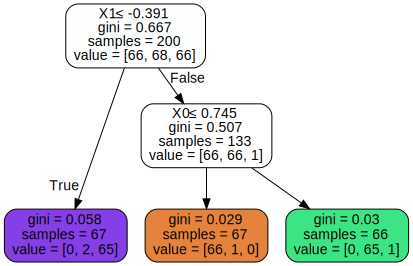

In [4]:
dot_data = export_graphviz(classifier, out_file=None, filled=True, rounded=True, 
                           special_characters=True, leaves_parallel=True)
graph = graphviz.Source(dot_data)
# graph.render("test", format='png')
graph 

## Pruning on the Iris dataset

In [5]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

classifier = DecisionTreeClassifier(max_depth=4)
classifier_with_pruning = DecisionTreeClassifier(max_depth=4, ccp_alpha=.1)
classifier.fit(X, y)
classifier_with_pruning.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.1, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training data accuracy 99.3%


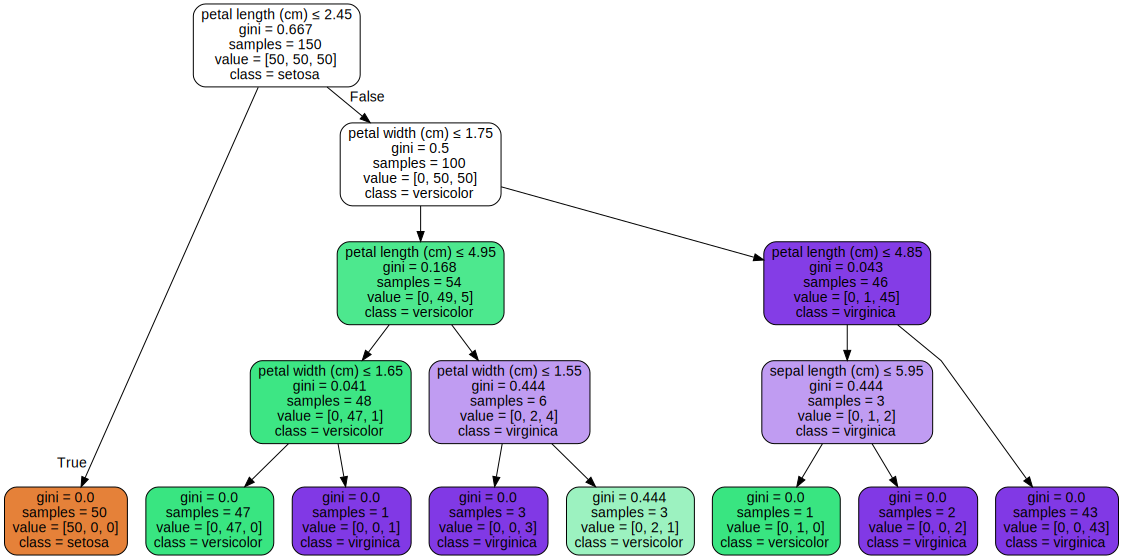

In [6]:
print("Training data accuracy %.1f%%" % (100*classifier.score(X, y)))
dot_data = export_graphviz(classifier, out_file=None, filled=True, rounded=True, 
                           special_characters=True, leaves_parallel=True, feature_names=load_iris().feature_names, 
                           class_names=load_iris().target_names)
graph = graphviz.Source(dot_data)  
graph 

Training data accuracy 96.0%


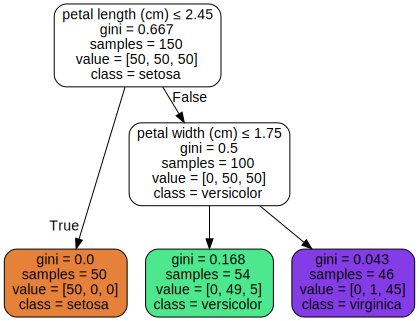

In [7]:
print("Training data accuracy %.1f%%" % (100*classifier_with_pruning.score(X, y)))
dot_data = export_graphviz(classifier_with_pruning, out_file=None, filled=True, rounded=True, 
                           special_characters=True, leaves_parallel=True, feature_names=load_iris().feature_names, 
                           class_names=load_iris().target_names)
graph = graphviz.Source(dot_data)  
graph


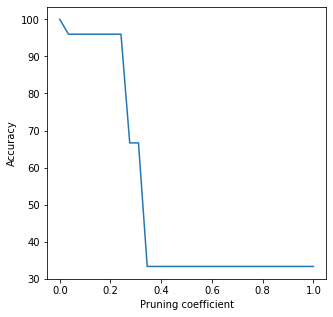

In [8]:
def make_tree_classifier(pruning):
  classifier = DecisionTreeClassifier(max_depth=10, ccp_alpha=pruning)
  classifier.fit(X, y)
  return classifier.score(X, y)

pruning_coefficients = np.linspace(0, 1, 30)

plt.figure(figsize=(5, 5))
plt.plot(pruning_coefficients, [100*make_tree_classifier(p) for p in pruning_coefficients])
plt.ylabel("Accuracy")
plt.xlabel("Pruning coefficient")
plt.show()

## Titanic

In [9]:
!wget -N https://cl.lingfil.uu.se/~frewa417/train.csv
!wget -N https://cl.lingfil.uu.se/~frewa417/test.csv

--2021-03-22 15:03:18--  https://cl.lingfil.uu.se/~frewa417/train.csv
Resolving cl.lingfil.uu.se (cl.lingfil.uu.se)... 130.238.78.148
Connecting to cl.lingfil.uu.se (cl.lingfil.uu.se)|130.238.78.148|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘train.csv’ not modified on server. Omitting download.

--2021-03-22 15:03:20--  https://cl.lingfil.uu.se/~frewa417/test.csv
Resolving cl.lingfil.uu.se (cl.lingfil.uu.se)... 130.238.78.148
Connecting to cl.lingfil.uu.se (cl.lingfil.uu.se)|130.238.78.148|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘test.csv’ not modified on server. Omitting download.



In [10]:
!head train.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


In [11]:
import csv
def load_titanic(file):
  with open('train.csv') as csvfile:
    X = list()
    y = list()
    names = list()
    feature_idx = [2, 4, 5, 6]
    for n, row in enumerate(csv.reader(csvfile)):
      if n == 0:
        all_feature_names = row
        feature_names = [row[i] for i in feature_idx]
      else:
        try:
          v = [row[i] for i in feature_idx]
          for i in range(len(v)):
            if v[i] == 'male':
              v[i] = 0
            elif v[i] == 'female':
              v[i] = 1
            else:
              v[i] = float(v[i])
          X.append(v)
          y.append(float(row[1]))
          names.append(row[3])
        except:
          pass
  assert len(X) == len(y)
  assert len(X) == len(names)
  X = np.asarray(X)
  y = np.asarray(y)
  assert X.shape[0] == y.shape[0]
  assert feature_names[1] == 'Sex'
  feature_names[1] = 'IsFemale'
  return X, y, feature_names
X, y, feature_names = load_titanic("train.csv")
print("Found %i data point for features %s" % (X.shape[0], feature_names))

Found 714 data point for features ['Pclass', 'IsFemale', 'Age', 'SibSp']


In [12]:
# print(all_feature_names)
# print(row)

In [13]:
X[:10, :]

array([[ 3.,  0., 22.,  1.],
       [ 1.,  1., 38.,  1.],
       [ 3.,  1., 26.,  0.],
       [ 1.,  1., 35.,  1.],
       [ 3.,  0., 35.,  0.],
       [ 1.,  0., 54.,  0.],
       [ 3.,  0.,  2.,  3.],
       [ 3.,  1., 27.,  0.],
       [ 2.,  1., 14.,  1.],
       [ 3.,  1.,  4.,  1.]])

Training accuracy: 82.1%


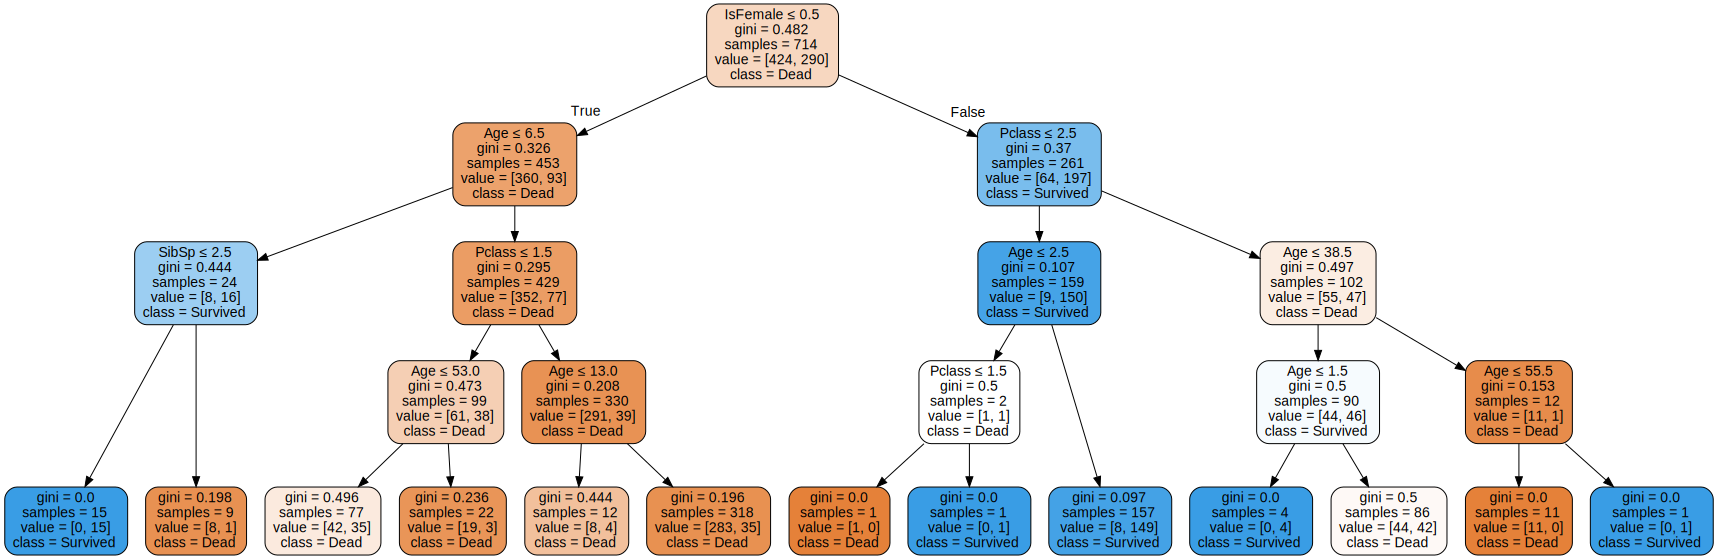

In [14]:
classifier = DecisionTreeClassifier(max_depth=4, ccp_alpha=.001)
classifier.fit(X, y)
print("Training accuracy: %.1f%%" % (100*classifier.score(X, y)))

dot_data = export_graphviz(classifier, out_file=None, feature_names=feature_names, 
                           class_names=['Dead', 'Survived'], filled=True,
                           rounded=True, special_characters=True, leaves_parallel=True, )  
graph = graphviz.Source(dot_data)
# graph.render("titanic")
graph.render("titanic", format='png')
graph

Training accuracy: 81.5%


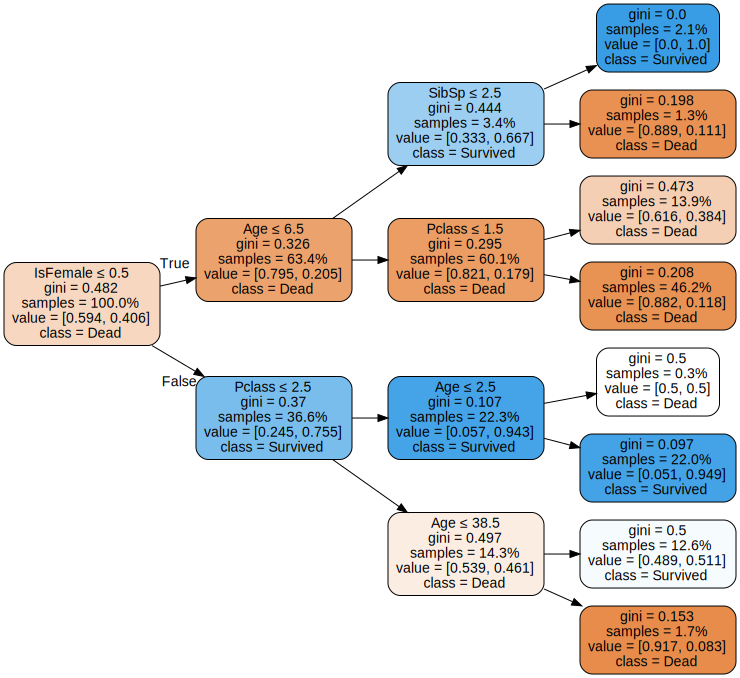

In [15]:
classifier = DecisionTreeClassifier(max_depth=3, ccp_alpha=.001)
classifier.fit(X, y)
print("Training accuracy: %.1f%%" % (100*classifier.score(X, y)))

dot_data = export_graphviz(classifier, out_file=None, feature_names=feature_names, 
                           class_names=['Dead', 'Survived'], filled=True,
                           rounded=True, special_characters=True, leaves_parallel=True, rotate=True, proportion=True)  
graph = graphviz.Source(dot_data)  
# graph.render("titanic")
graph 

Training accuracy: 81.2%


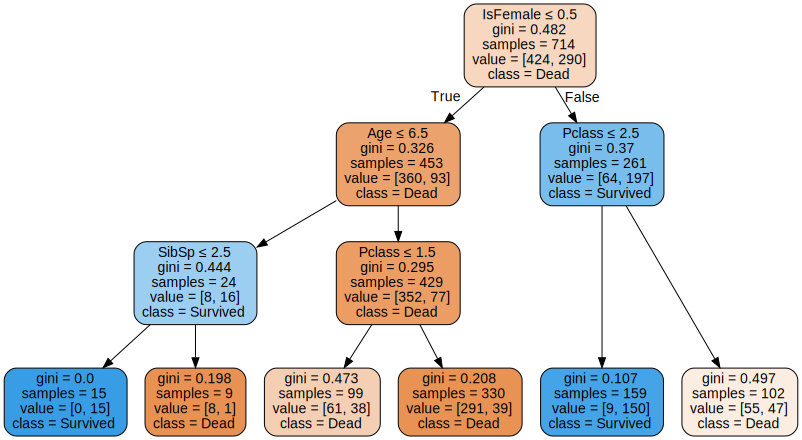

In [16]:
classifier = DecisionTreeClassifier(max_depth=5, ccp_alpha=.01)
classifier.fit(X, y)
print("Training accuracy: %.1f%%" % (100*classifier.score(X, y)))

dot_data = export_graphviz(classifier, out_file=None, feature_names=feature_names, 
                           class_names=['Dead', 'Survived'], filled=True,
                           rounded=True, special_characters=True, leaves_parallel=True)  
graph = graphviz.Source(dot_data)  
# graph.render("titanic")
graph 

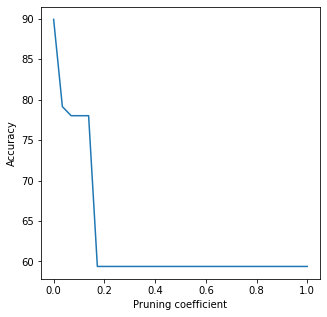

In [17]:
def make_tree_classifier(pruning):
  classifier = DecisionTreeClassifier(max_depth=10, ccp_alpha=pruning)
  classifier.fit(X, y)
  return classifier.score(X, y)

pruning_coefficients = np.linspace(0, 1, 30)

plt.figure(figsize=(5, 5))
plt.plot(pruning_coefficients, [100*make_tree_classifier(p) for p in pruning_coefficients])
plt.ylabel("Accuracy")
plt.xlabel("Pruning coefficient")
plt.show()

Overfitting

Training accuracy: 89.9%


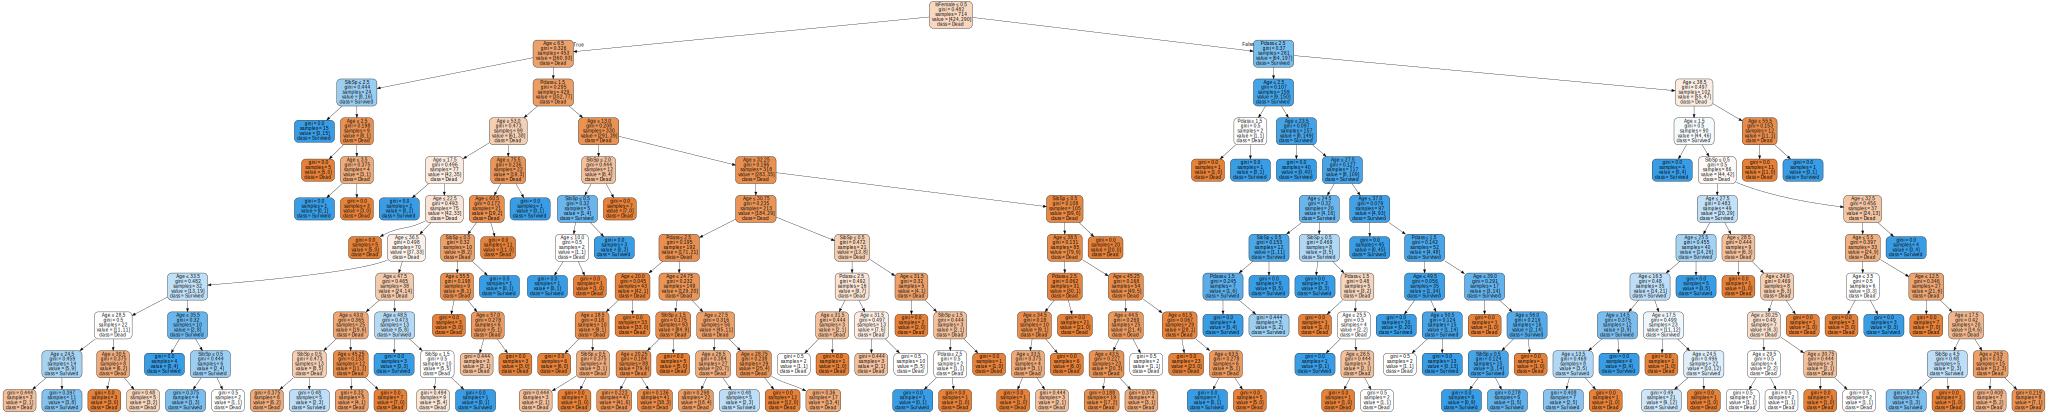

In [18]:
classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(X, y)
print("Training accuracy: %.1f%%" % (100*classifier.score(X, y)))

dot_data = export_graphviz(classifier, out_file=None, feature_names=feature_names, 
                           class_names=['Dead', 'Survived'], filled=True,
                           rounded=True, special_characters=True)#, leaves_parallel=True)  
graph = graphviz.Source(dot_data)  
# graph.render("titanic")
graph 